# How to build beautiful plots with Python and Seaborn

## The guide to plotting data with Python and Seaborn

This is the source code for the tutorial on Seaborn.

First, we import a few things we will need throught the tutorial

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.reset_orig()

## Building your first plots

In [46]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Scatter plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

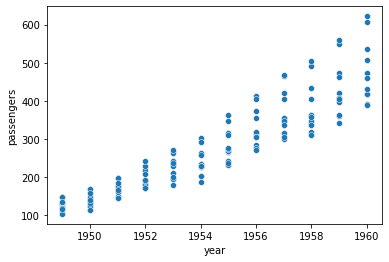

In [47]:
sns.scatterplot(data=flights_data, x="year", y="passengers")

### Line plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

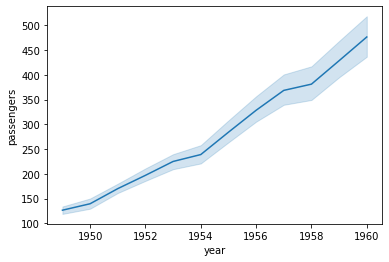

In [48]:
sns.lineplot(data=flights_data, x="year", y="passengers")

### Bar plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

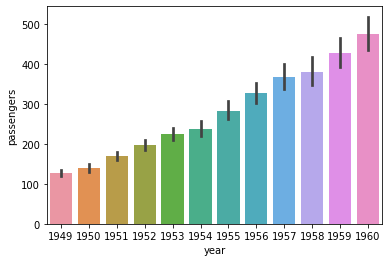

In [49]:
sns.barplot(data=flights_data, x="year", y="passengers")

## Extending with matplotlib

<AxesSubplot:xlabel='depth', ylabel='count'>

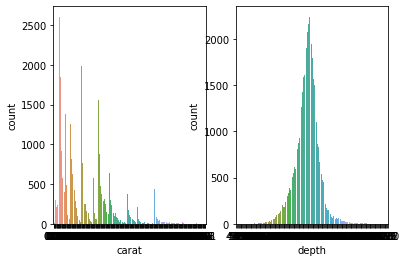

In [50]:
diamonds_data = sns.load_dataset('diamonds')
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data)
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data)

## Seaborn loves Pandas

<AxesSubplot:xlabel='country', ylabel='beer_servings'>

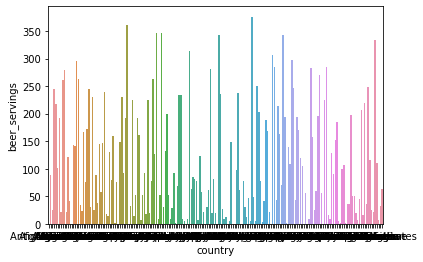

In [51]:
drinks_df = pd.read_csv("data/drinks.csv")
sns.barplot(x="country", y="beer_servings", data=drinks_df)

## Making beautiful plots with styles

<AxesSubplot:xlabel='year', ylabel='passengers'>

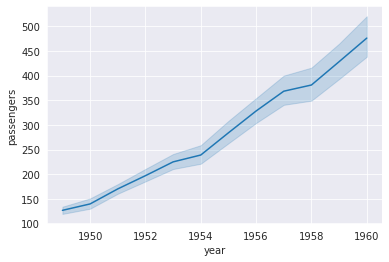

In [52]:
sns.set_style("darkgrid")
sns.lineplot(data=flights_data, x="year", y="passengers")


<AxesSubplot:xlabel='year', ylabel='passengers'>

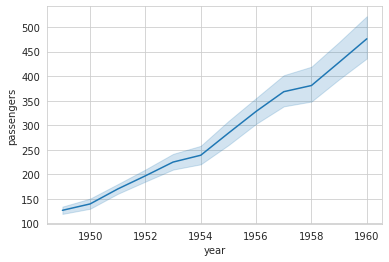

In [53]:
sns.set_style("whitegrid")
sns.lineplot(data=flights_data, x="year", y="passengers")

## Cool use cases

In [54]:
tips_df = sns.load_dataset('tips')
tips_df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
tips_df["tip_percentage"] = tips_df["tip"] / tips_df["total_bill"]
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Tip percentages

<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

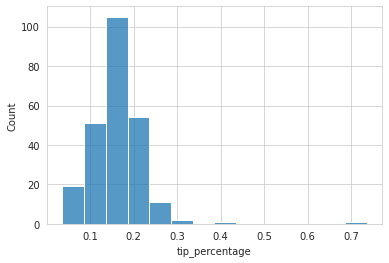

In [56]:
sns.histplot(data=tips_df["tip_percentage"], binwidth=0.05)

<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

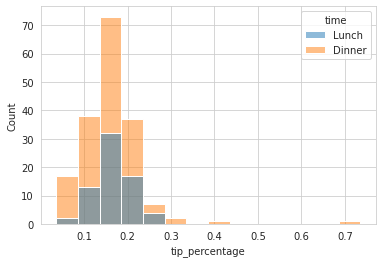

In [57]:
sns.histplot(data=tips_df, x="tip_percentage", binwidth=0.05, hue="time")


### Total of tips per day of the week

<AxesSubplot:xlabel='day', ylabel='tip'>

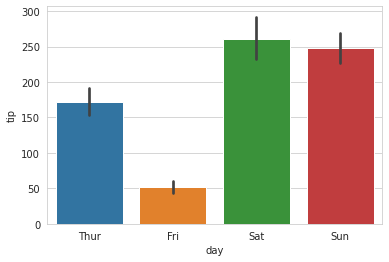

In [58]:
sns.barplot(data=tips_df, x="day", y="tip", estimator=np.sum)

### Impact of table size and day on the tip

<AxesSubplot:xlabel='size', ylabel='day'>

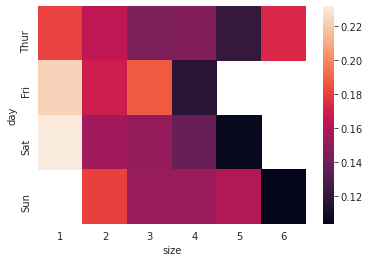

In [59]:
pivot = tips_df.pivot_table(
    index=["day"],
    columns=["size"],
    values="tip_percentage",
    aggfunc=np.average)
sns.heatmap(pivot)